In [100]:
import cv2
import random
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
print(cv2.__version__)

4.7.0


In [102]:
#marathi name plate
#!wget https://custombazar.in/wp-content/uploads/2020/06/marathi-ind-gel-number-plate-keychains.jpg
#!wget https://d2m3nfprmhqjvd.cloudfront.net/blog/20220914202130/BH-SERIES-NUMBER-PLATES-FEATURED-IMAGE.jpg
#!wget https://staticimg.amarujala.com/assets/images/2022/09/04/750x506/yellow-number-plate_1662274112.png
#!wget https://www.cartoq.com/wp-content/uploads/2022/06/safari-with-green-number-plate-featured.jpg
#!wget https://c7.alamy.com/comp/2J3TRG8/mumbai-india-april-08-2022-the-bharat-series-number-plates-introduced-by-the-india-ministry-of-road-transport-and-highways-to-make-the-mobility-of-2J3TRG8.jpg

--2023-05-06 15:40:52--  https://c7.alamy.com/comp/2J3TRG8/mumbai-india-april-08-2022-the-bharat-series-number-plates-introduced-by-the-india-ministry-of-road-transport-and-highways-to-make-the-mobility-of-2J3TRG8.jpg
Resolving c7.alamy.com (c7.alamy.com)... 99.86.38.12, 99.86.38.38, 99.86.38.46, ...
Connecting to c7.alamy.com (c7.alamy.com)|99.86.38.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘mumbai-india-april-08-2022-the-bharat-series-number-plates-introduced-by-the-india-ministry-of-road-transport-and-highways-to-make-the-mobility-of-2J3TRG8.jpg.1’

mumbai-india-april-     [ <=>                ]  72.46K  --.-KB/s    in 0.008s  

Last-modified header invalid -- time-stamp ignored.
2023-05-06 15:40:52 (8.39 MB/s) - ‘mumbai-india-april-08-2022-the-bharat-series-number-plates-introduced-by-the-india-ministry-of-road-transport-and-highways-to-make-the-mobility-of-2J3TRG8.jpg.1’ saved [74194]



In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
images_dir = "/content/"
files = os.listdir(images_dir)
image_files = []
for file in files:
  if ".jpg" in file:
    image_files.append(file)

In [123]:
image_files

['mumbai-india-april.jpg',
 'BH-SERIES-NUMBER-PLATES-FEATURED-IMAGE.jpg',
 'safari-with-green-number-plate-featured.jpg',
 'marathi-ind-gel-number-plate-keychains.jpg']

In [125]:
image = cv2.imread(image_files[1])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [126]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

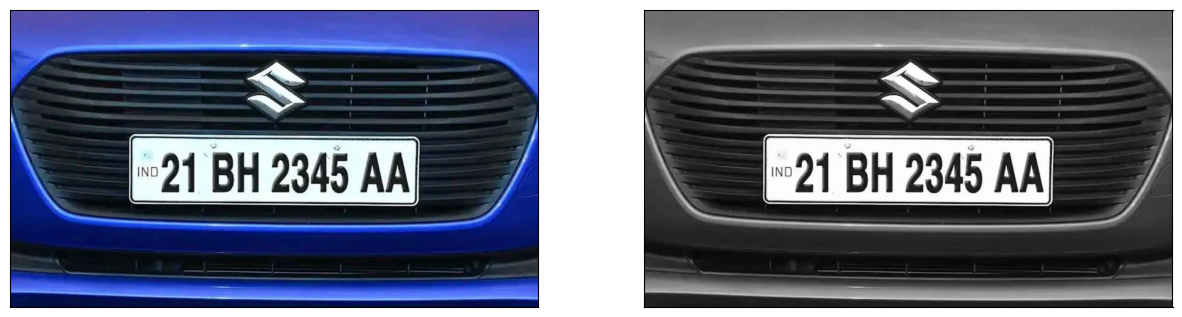

In [127]:
plot_images(image, gray)

In [128]:
blur = cv2.bilateralFilter(gray, 11,90, 90)

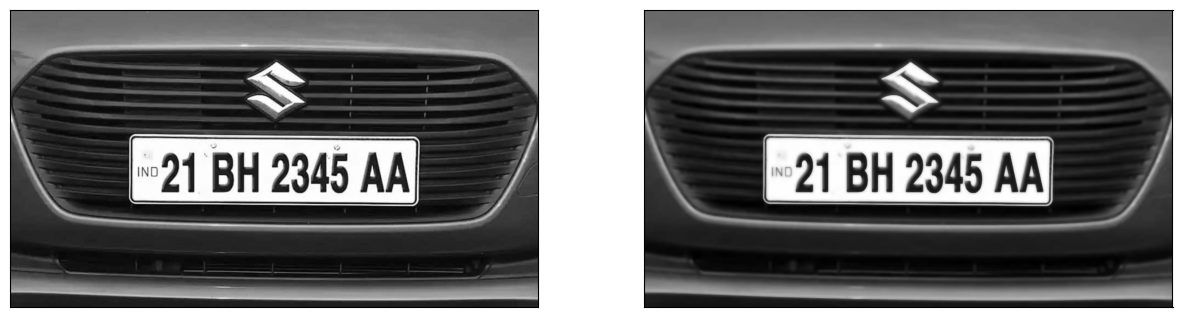

In [129]:
plot_images(gray, blur)

In [130]:
edges = cv2.Canny(blur, 30, 200)

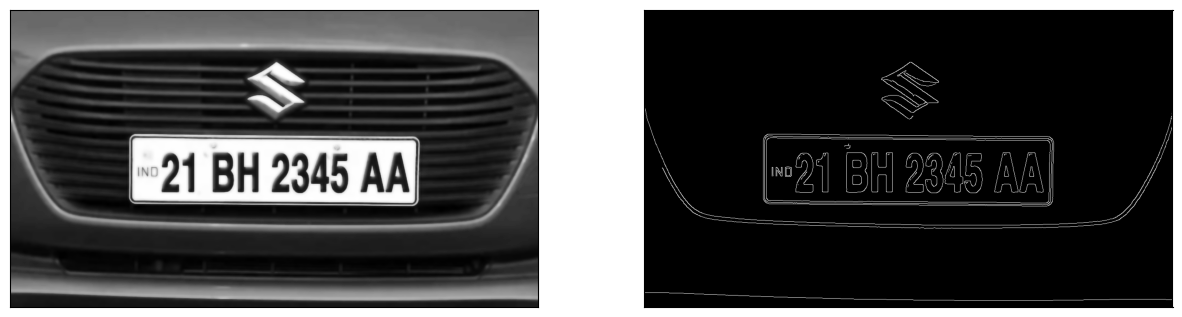

In [131]:
plot_images(blur, edges)

In [132]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [133]:
image_copy = image.copy()

In [134]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

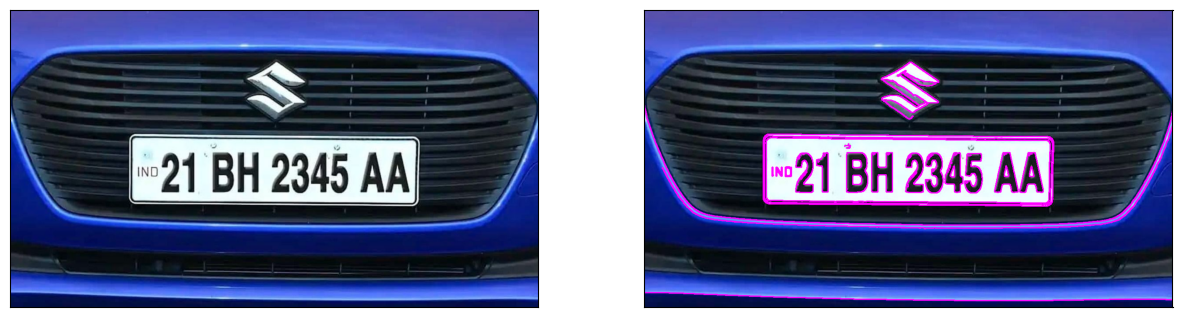

In [135]:
plot_images(image, image_copy)

In [136]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [137]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

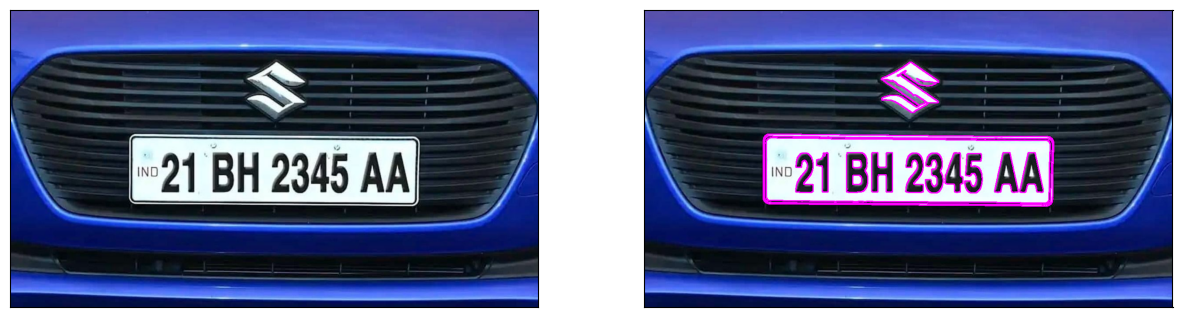

In [138]:
plot_images(image, image_copy)

In [139]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

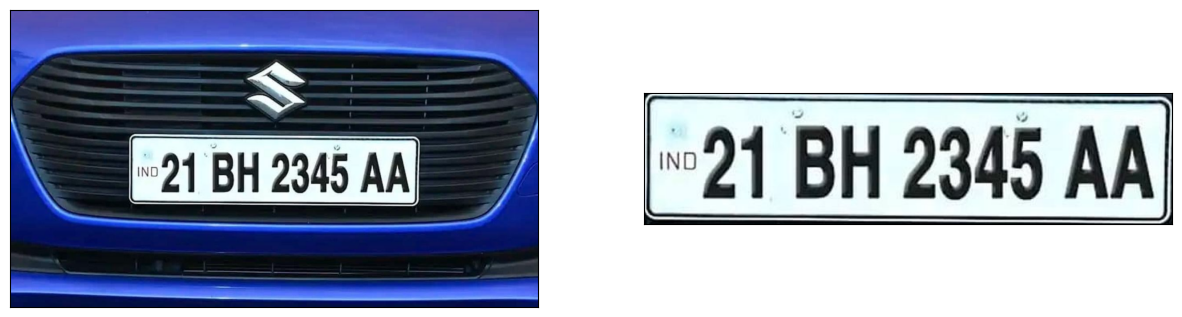

In [140]:
plot_images(image, plate)

In [141]:
#!pip install pytesseract

In [142]:
#!apt-get install tesseract-ocr

In [143]:
import pytesseract as p

text = p.image_to_string(plate, lang="eng")

In [144]:
print(text)

= BH 2345 AA

